In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [3]:
df.shape

(400, 4097)

In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
len(X_train)

300

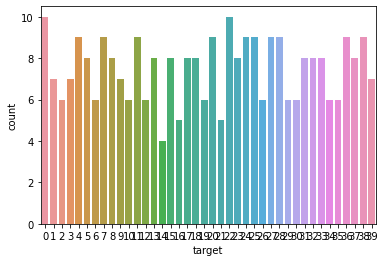

In [38]:
ax = sns.countplot(y_train)

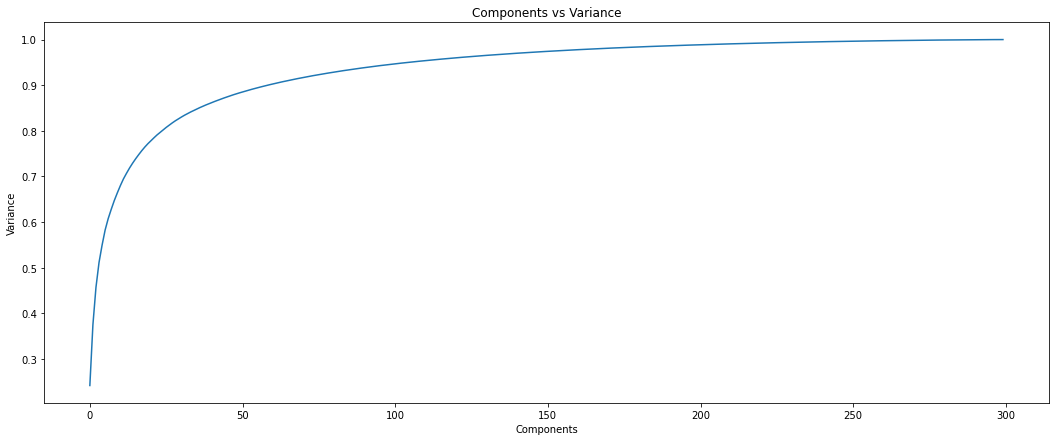

In [30]:
# only for plotting variance 

pca = PCA().fit(X_train)

plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Components')
plt.ylabel('Variance')
plt.title('Components vs Variance')
plt.show()

In [9]:
pca.components_.shape

(300, 4096)

In [10]:
pca.components_

array([[-2.72302905e-03, -6.13837113e-03, -9.11740751e-03, ...,
        -6.16551248e-04,  2.08894854e-03,  2.50611415e-03],
       [-2.92018921e-02, -3.39975337e-02, -3.84844578e-02, ...,
         2.66500984e-02,  2.50071982e-02,  2.27202323e-02],
       [-1.69201133e-04, -2.53993497e-03, -1.57601313e-03, ...,
        -1.47080452e-02, -1.28624135e-02, -1.04743509e-02],
       ...,
       [ 8.11267707e-03, -6.98755553e-03,  1.28006048e-03, ...,
        -1.95821876e-02, -2.59200498e-02,  9.56113406e-05],
       [-4.65953333e-03, -2.80942939e-02,  2.59097023e-02, ...,
        -4.08309764e-03, -8.73936030e-03,  2.07853930e-02],
       [-2.88928750e-02,  8.95276811e-03,  9.85566682e-03, ...,
         1.12192532e-02, -1.35572530e-03, -7.67120670e-03]])

In [11]:
# number of pca components is same as the rows in X_train

In [12]:
pca = PCA(n_components=256).fit(X_train) # fitting again , now from only 256 componentts
# taking 256 components to plot a downsampled square image

In [13]:
X_train_pca = pca.transform(X_train) # should be new data ?

In [14]:
X_train_pca.shape # adjust train data acc. to len (li) features only

(300, 256)

In [15]:
# classification after reducing dimensions 

classifier = SVC().fit(X_train_pca, y_train) # svm classifier

In [16]:
X_test_pca = pca.transform(X_test)
predictions = classifier.predict(X_test_pca) # y_pred

In [17]:
print(classification_report(y_test, predictions)) # (y_true, y_pred) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         4
           3       0.75      1.00      0.86         3
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.60      0.75      0.67         4
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         2
          16       1.00      0.60      0.75         5
          17       1.00    

In [18]:
predictions[0]

16

In [25]:
y_test.iloc[0]

16

In [20]:
X_test_pca.shape

(100, 256)

In [21]:
def plot_faces(pixels,y_true,y_test):
    plt.imshow(np.array(pixels).reshape(16, 16), cmap='gray')
    plt.show()
    print("True label: ", y_true)
    print("Test label: ", y_test)

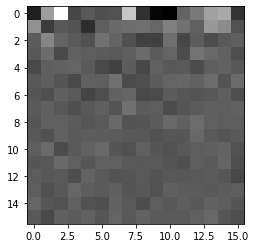

True label:  16
Test label:  16


In [26]:
# plotting a downsampled face 

plot_faces(X_test_pca[0],y_test.iloc[0],predictions[0])